## ML for regression

In [1]:
import pandas as pd
import numpy as np
import os

## Data preparation

In [3]:
os.system("wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")

--2025-09-30 15:53:59--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

     0K .......... .......... .......... .......... ..........  3% 25.9M 0s
    50K .......... .......... .......... .......... ..........  6% 83.1M 0s
   100K .......... .......... .......... .......... .......... 10% 31.1M 0s
   150K .......... .......... .......... .......... .......... 13%  143M 0s
   200K .......... .......... .......... .......... .......... 17% 33.2M 0s
   250K .......... .......... .......... .......... .......... 20%  458M 0s
   300K .......... .......... .......... .......... .......... 24%  192M 0s
   350K ..

0

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df["market_category"].value_counts()

market_category
Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,High-Performance              1
Crossover,Exotic,Luxury,Performance                   1
Performance,Hybrid                                    1
Exotic,Luxury,High-Performance,Hybrid                 1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Name: count, Length: 71, dtype: int64

In [7]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [10]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [11]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


## exploratory data analysis

In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'engine_hp'}>,
        <Axes: title={'center': 'engine_cylinders'}>],
       [<Axes: title={'center': 'number_of_doors'}>,
        <Axes: title={'center': 'highway_mpg'}>,
        <Axes: title={'center': 'city_mpg'}>],
       [<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'msrp'}>, <Axes: >]], dtype=object)

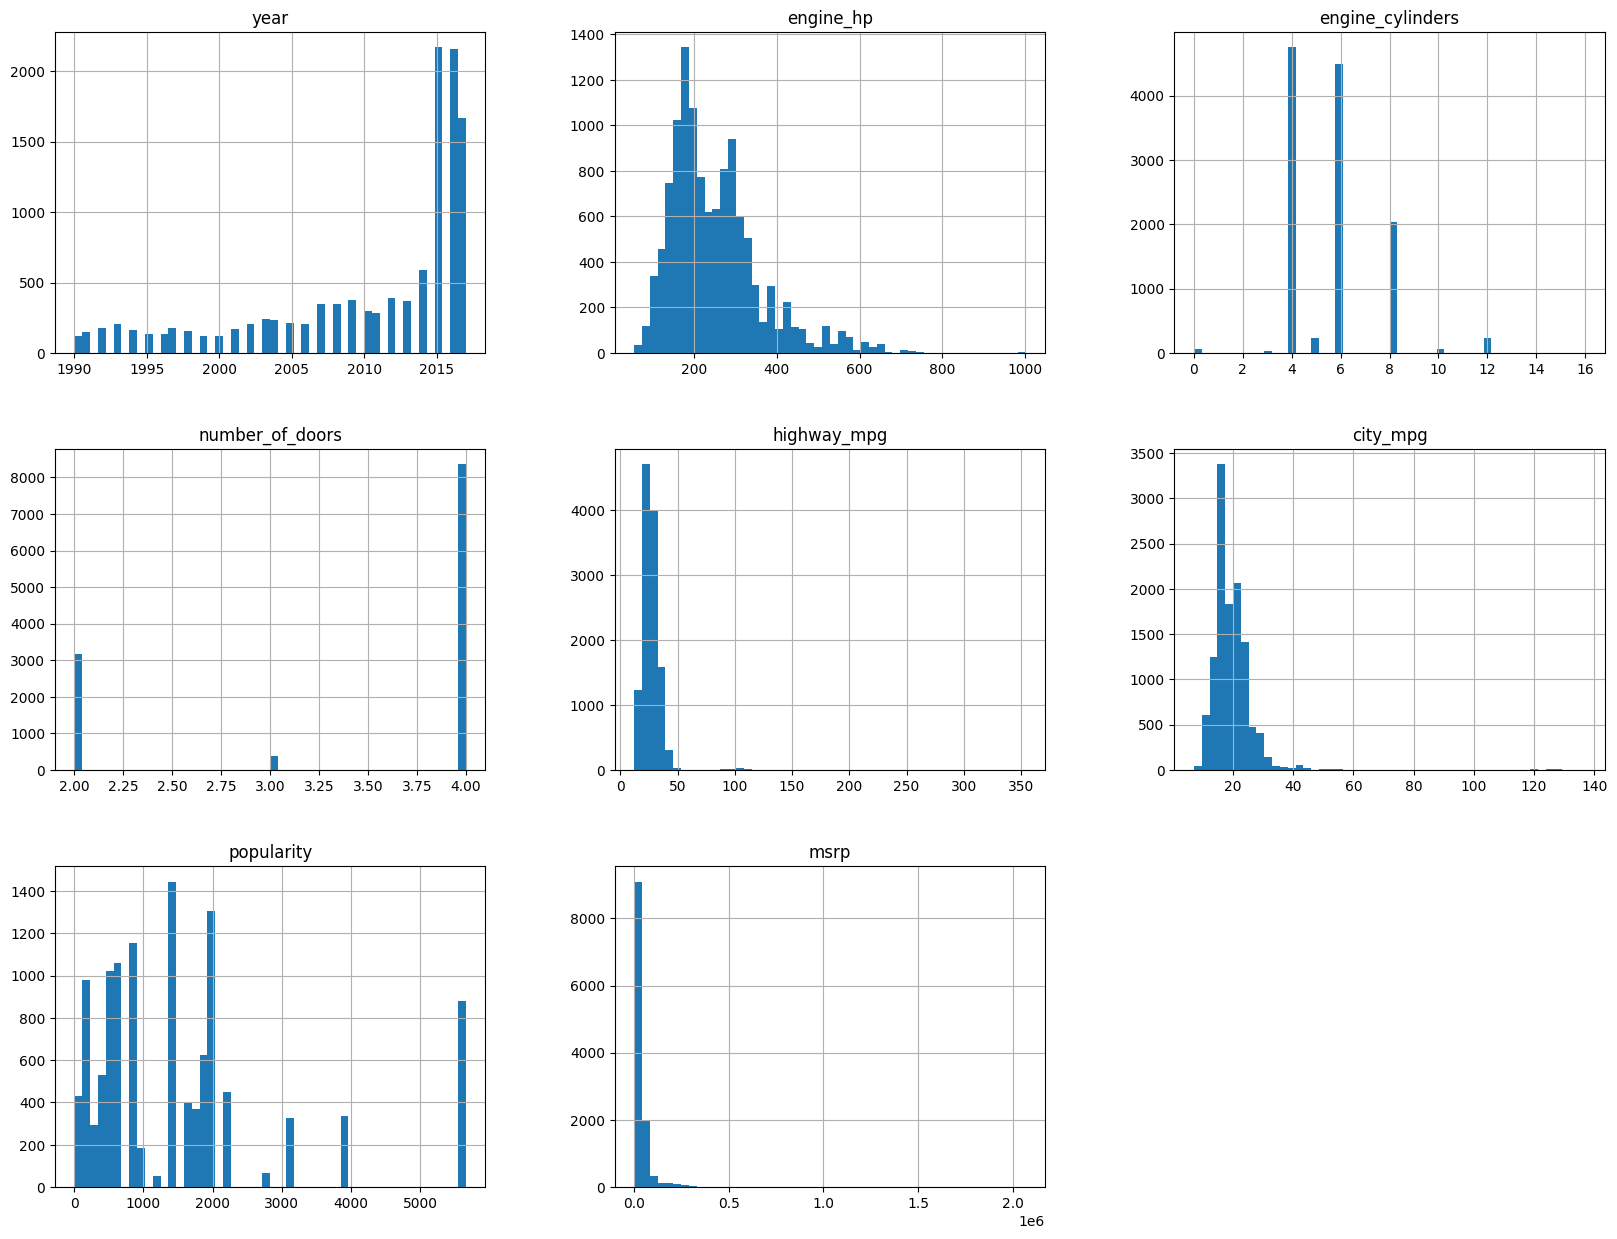

In [14]:
df.hist(bins=50, figsize=(20,15))

<Axes: xlabel='msrp', ylabel='Count'>

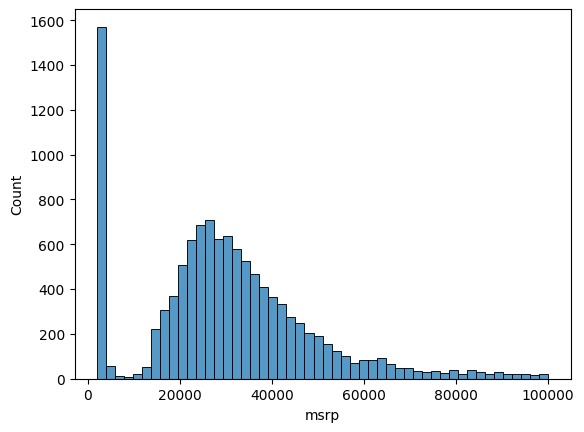

In [15]:
sns.histplot(df.msrp[df.msrp <100000], bins=50)

In [16]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

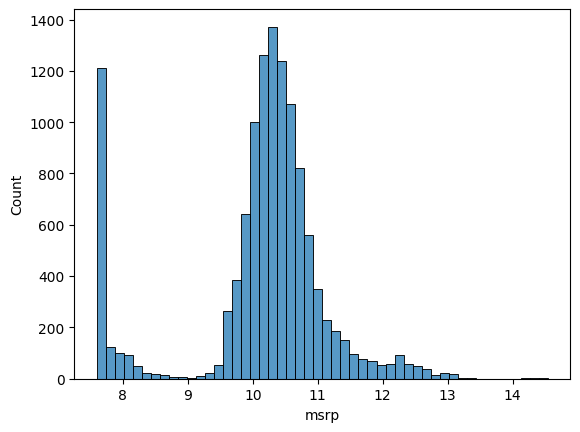

In [17]:
sns.histplot(price_logs, bins=50)

In [18]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

In [19]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test 

In [20]:
n

11914

In [21]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [22]:
df.iloc[[10,5,8,9,0]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135


In [23]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [24]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [25]:
np.random.seed(2)
np.random.shuffle(idx)

In [26]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [27]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [28]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [29]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [30]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [32]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [33]:
len(y_train)

7150

## Simple Linear regression  with just 3 feature and random weight(slope) and intercept

In [34]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [35]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [36]:
def simple_linear_regression(xi):
    #do something
    n = len(xi)
    pred = w0

    for k in range(n):
        pred = pred + w[k] * xi[k]

    return pred

In [37]:
simple_linear_regression(xi)

12.312

In [38]:
len(xi)

3

In [39]:
# change back to original To unlog it
np.expm1(12.312)

np.float64(222347.2221101062)

In [40]:
np.log1p(222347.2221101062)

np.float64(12.312)

## Linear regression vector form

The formula of linear regression can be synthesized with the dot product between features and weights. The feature vector includes the bias term with an x value of one

When all the records are included, the linear regression can be calculated with the dot product between feature matrix and vector of weights, obtaining the y vector of predictions.

In [41]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    for k in range(n):
        res = res + xi[k] * w[k]
    return res
    

In [42]:
len(xi)

3

In [43]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [44]:
linear_regression(xi)

12.312000000000001

In [45]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [46]:
xi = [1] + xi
xi

[1, 453, 11, 86]

In [47]:
def linear_regression(xi):
    return dot(xi, w_new)

In [48]:
linear_regression(xi)

12.312

In [49]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [50]:
x1 = [1, 148, 24, 1358]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

x = [x1, x2, x10]
x = np.array(x)
x

array([[   1,  148,   24, 1358],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [51]:
x

array([[   1,  148,   24, 1358],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [52]:
def linear_regression(m):
    return m.dot(w_new)

In [53]:
linear_regression(x)

array([12.326, 13.552, 12.312])

## Training a linear regression model: Normal equation

Obtaining predictions as close as possible to $y$ target values requires the calculation of weights from the general
LR equation. The feature matrix does not 
have an inverse because it is not square, so it is required to obtain an approximate solution, which can be
obtained using the **Gram matrix** 
(multiplication of feature matrix ($X$) and its transpose ($X^T$)). The vector of weights or coefficients $w$ obtained with this
formula is the closest possible solution to the LR system.

Normal Equation:

$w$ = $(X^TX)^{-1}X^Ty$

Where:

$X^TX$ is the Gram Matrix

In [54]:
def train_linear_regression(X, y):
    pass

In [55]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [56]:
one = np.ones(X.shape[0])
one

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
X = np.column_stack([one, X])

In [58]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [59]:
#((np.linalg.inv((X.T).dot(X)) ).dot(X.T)).dot(y)

XTX = (X.T).dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y) 

In [60]:
XTX = (X.T).dot(X)
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [61]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [62]:
w_full = XTX_inv.dot(X.T).dot(y) 

In [63]:
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [64]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(25844.754055766833),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [65]:
def train_linear_regression(X, y):
    one = np.ones(X.shape[0])
    X = np.column_stack([one, X])
    XTX = (X.T).dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [68]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [69]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [70]:
train_linear_regression(X, y) 

(np.float64(25844.754055766833),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

## Car price baseline model

In [71]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [72]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [73]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [74]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [75]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [76]:
w0, w = train_linear_regression(X_train, y_train)


In [77]:
y_pred = w0 + X_train.dot(w)

In [78]:
w0

np.float64(7.927257388070037)

In [79]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

In [80]:
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

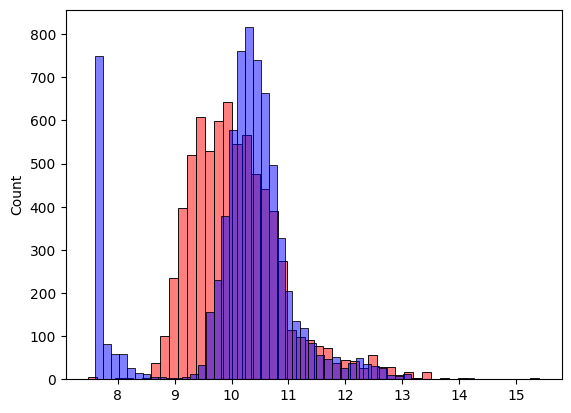

In [81]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## RMSE
* Earlier we found out our predictions were a bit off from the actual target values in the training dataset. We need a way to quantify how good or bad the model is. This is where RMSE can be of help.
* Root Mean Squared Error (RMSE) is a way to evaluate regression models. It measures the error associated with the model being evaluated. This numerical figure can then be used to compare models, enabling us to choose the one that gives the best predictions.

$$RMSE = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} {(g(x_i) - y_i)^2}}$$

- $g(x_i)$ is the prediction
- $y_i$ is the actual value
- $m$ is the number of observations in the dataset (i.e. cars)


In [82]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [83]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## Validating the model

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']


X_train = df_train[base].fillna(0).values
X_train

In [89]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7150 non-null   object 
 1   model              7150 non-null   object 
 2   year               7150 non-null   int64  
 3   engine_fuel_type   7149 non-null   object 
 4   engine_hp          7110 non-null   float64
 5   engine_cylinders   7136 non-null   float64
 6   transmission_type  7150 non-null   object 
 7   driven_wheels      7150 non-null   object 
 8   number_of_doors    7144 non-null   float64
 9   market_category    4899 non-null   object 
 10  vehicle_size       7150 non-null   object 
 11  vehicle_style      7150 non-null   object 
 12  highway_mpg        7150 non-null   int64  
 13  city_mpg           7150 non-null   int64  
 14  popularity         7150 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 838.0+ KB


In [91]:
## Training the model
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

## Validate the model
X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7616530991301627)

## Simple feature egineering

In [96]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [98]:
def prepare_X(df):
    df = df.copy()
    
    df['Age'] = 2017 - df.year
    features = base + ['Age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [99]:
## Training the model
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

## Validate the model
X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058327)

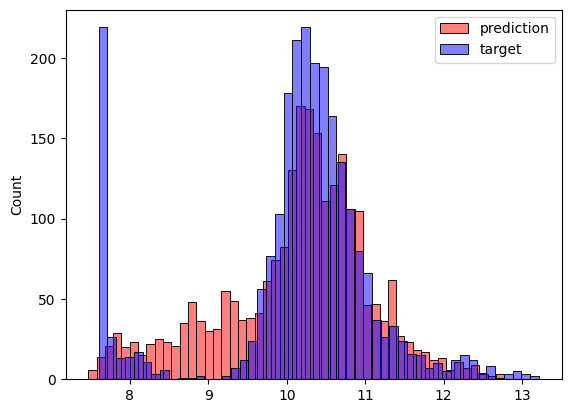

In [102]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## Categorical Variables
Categorical variables are typically represented as strings, and pandas identifies them as object types. However, some variables that appear to be numerical may actually be categorical (e.g., the number of doors a car has). All these categorical variables need to be converted to a numerical form because ML models can interpret only numerical features. It is possible to incorporate certain categories from a feature, not necessarily all of them. This transformation from categorical to numerical variables is known as One-Hot encoding.

In [106]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [ ]:

(df_train.number_of_doors == 4).astype(int)

0       0
1       1
2       1
3       0
4       1
       ..
7145    0
7146    0
7147    1
7148    1
7149    1
Name: number_of_doors, Length: 7150, dtype: int64

In [113]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')  
    #features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)


X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5157995641501902)

In [128]:
categorical_columns = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style', 'number_of_doors']

categorical = {}
for c in categorical_columns:
    categorical[c] = list(df[c].value_counts().head().index)
    

In [131]:
categorical

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback'],
 'number_of_doors': [4.0, 2.0, 3.0]}

In [127]:
list(df.make.value_counts().head().index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [132]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')  
    

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [133]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)


X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(331.1867454293865)

In [134]:
w0, w

(np.float64(4.084517286803815e+16),
 array([-2.20307814e+00,  5.83872540e+01, -1.90149865e+01, -4.21168569e+00,
        -1.42885834e-02, -1.52162553e+01, -4.96320045e+03, -5.48179967e+03,
        -6.04979634e+03, -6.81786607e+00,  7.44009816e+00,  1.02249123e+01,
         8.06687147e+00,  2.68967360e+00, -1.42448143e+01, -5.88916478e+01,
        -5.83364473e+01, -3.09162306e+01, -2.33231897e+00, -1.09537684e+02,
        -1.45134450e+02, -1.73025188e+02, -4.88170719e+01, -2.68995817e+02,
        -2.64644426e+16, -2.64644426e+16, -2.64644426e+16, -2.64644426e+16,
        -2.64644426e+16, -1.43807303e+16, -1.43807303e+16, -1.43807303e+16,
        -1.43807303e+16, -1.36790891e+01,  5.69995755e+00,  2.96018391e+00,
         2.78089274e-01, -1.22484669e+00,  7.15434940e+01,  6.23602150e+01,
         5.37702757e+01, -8.44316325e-02,  6.13911333e-03,  1.76928471e-01,
         3.74550688e-01, -1.96367745e-01,  5.50064224e+02, -1.44089147e+02,
        -2.00183066e+02]))

## Regularization